In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync.ib import IB, util
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.data_manager import DataManager, DataSource
from optopus.data_objects import IndexAsset, OptionChainAsset
from optopus.utils import pdo

%matplotlib inline

In [2]:
host = '127.0.0.1'
#port = 4002  # Gateway
port = 7497  # TWS
client = 2

util.startLoop()
ib = IB()
ib.connect(host, port, client)
opt = Optopus(IBBrokerAdapter(ib))

In [3]:
symbol = 'SPX'
u = IndexAsset(symbol, DataSource.IB)
uf = ['high', 'low', 'close', 'bid', 'bid_size', 'ask', 'ask_size',
             'last', 'last_size', 'time', 'midpoint', 'market_price']
oc = OptionChainAsset(u, underlying_distance=1.5)
ocf = ['high', 'low', 'close',
      'bid', 'bid_size', 'ask', 'ask_size', 'last', 'last_size',
      'volume', 'delta', 'gamma', 'theta', 'vega', 'implied_volatility', 'underlying_price', 'underlying_dividens', 
      'moneyness', 'intrinsic_value', 'extrinsic_value', 'option_price', 'time']

In [4]:
udf = pdo(opt.current(u, uf))
ocdf = pdo(opt.current(oc, ocf))

ERROR:ib_insync.client:Decode failed
Traceback (most recent call last):
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 252, in _onSocketHasData
    self._decode(fields)
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 323, in _decode
    float(price), int(size))
ValueError: could not convert string to float: 
ERROR:ib_insync.client:Decode failed
Traceback (most recent call last):
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 252, in _onSocketHasData
    self._decode(fields)
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 323, in _decode
    float(price), int(size))
ValueError: could not convert string to float: 


Contracts: 68 Unqualified: 0


In [5]:
udf

code                                         SPX
high                                     2836.81
low                                      2831.44
close                                    2818.37
bid                                          NaN
bid_size                                     NaN
ask                                          NaN
ask_size                                     NaN
last                                      2836.4
last_size                                      0
time            2018-08-16 13:33:43.817152+00:00
midpoint                                     NaN
market_price                              2836.4
dtype: object

In [6]:
ocdf.columns

Index(['expiration', 'strike', 'right', 'high', 'low', 'close', 'bid',
       'bid_size', 'ask', 'ask_size', 'last', 'last_size', 'volume', 'delta',
       'gamma', 'theta', 'vega', 'implied_volatility', 'underlying_price',
       'moneyness', 'intrinsic_value', 'extrinsic_value', 'option_price',
       'time'],
      dtype='object')

In [7]:
expiration = ocdf.expiration.unique()[1]
underlying_price = ocdf.underlying_price.unique()[0]
oedf = ocdf[ocdf['expiration']==expiration]

In [8]:
df = oedf[oedf['right'] == 'C']
df

,expiration,strike,right,high,low,close,bid,bid_size,ask,ask_size,...,gamma,theta,vega,implied_volatility,underlying_price,moneyness,intrinsic_value,extrinsic_value,option_price,time
code,,,,,,,,,,,,,,,,,,,,,
SPX,2018-09-20,2795.0,C,NaN,NaN,55.90,63.9,1028,65.3,893,...,0.003615,-0.604113,3.247750,0.112732,2836.74,ITM,41.74,22.020630,63.760630,2018-08-16 13:34:04.224243+00:00
SPX,2018-09-20,2800.0,C,60.75,59.80,52.30,60.6,45,61.2,263,...,0.003742,-0.601925,3.304932,0.110788,2836.90,ITM,36.90,23.108061,60.008061,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2805.0,C,56.95,56.95,48.75,56.8,45,57.3,90,...,0.003872,-0.599144,3.360488,0.108885,2836.90,ITM,31.90,24.334196,56.234196,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2810.0,C,53.20,53.20,45.30,53.0,45,53.6,191,...,0.003999,-0.595453,3.411458,0.107024,2836.90,ITM,26.90,25.652007,52.552007,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2815.0,C,48.60,48.60,41.95,49.4,45,50.0,255,...,0.004122,-0.590760,3.456833,0.105207,2836.90,ITM,21.90,27.068007,48.968007,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2820.0,C,46.10,46.00,38.70,45.9,45,46.4,293,...,0.004239,-0.584973,3.495534,0.103439,2836.90,ITM,16.90,28.588845,45.488845,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2825.0,C,42.55,42.30,35.55,42.4,45,43.0,395,...,0.004349,-0.578003,3.526427,0.101719,2836.90,ITM,11.90,30.221230,42.121230,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2830.0,C,39.30,39.30,32.50,39.0,75,39.6,390,...,0.004449,-0.569765,3.548344,0.100051,2836.90,ITM,6.90,31.971850,38.871850,2018-08-16 13:34:03.773126+00:00
SPX,2018-09-20,2835.0,C,NaN,NaN,29.60,35.8,75,36.3,310,...,0.004537,-0.560187,3.560119,0.098437,2836.90,ITM,1.90,33.847267,35.747267,2018-08-16 13:34:03.773126+00:00


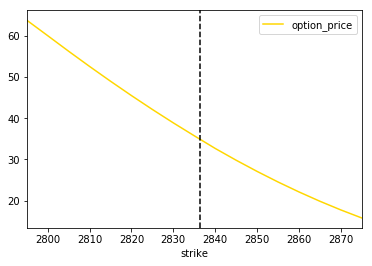

In [9]:
df.plot(kind='line', x='strike', y='option_price', color='gold').axvline(underlying_price, color='k', linestyle='--')

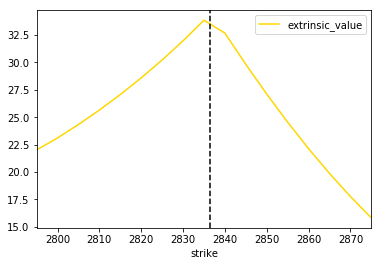

In [23]:
df.plot(kind='line', x='strike', y='extrinsic_value', color='gold').axvline(underlying_price, color='k', linestyle='--')

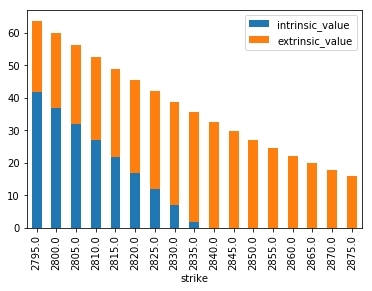

In [22]:
df[['strike', 'intrinsic_value', 'extrinsic_value']].plot(x='strike', kind='bar', stacked=True)

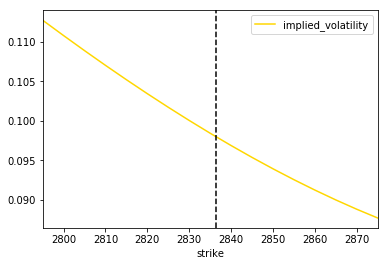

In [10]:
df.plot(kind='line', x='strike', y='implied_volatility', color='gold').axvline(underlying_price, color='k', linestyle='--')

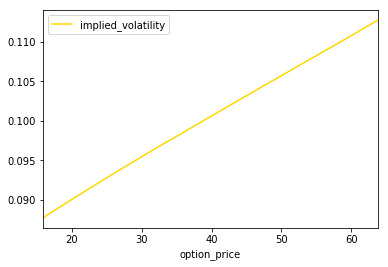

In [11]:
df.sort_values('option_price').plot(kind='line', x='option_price', y='implied_volatility', color='gold')

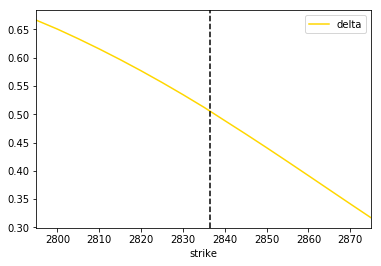

In [12]:
df.plot(kind='line', x='strike', y='delta', color='gold').axvline(underlying_price, color='k', linestyle='--')

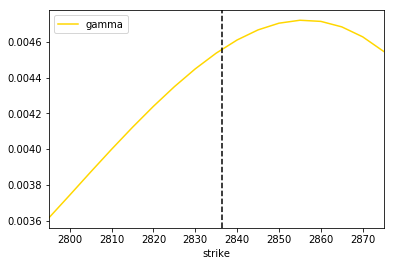

In [13]:
df.plot(kind='line', x='strike', y='gamma', color='gold').axvline(underlying_price, color='k', linestyle='--')